<a href="https://colab.research.google.com/github/RobBurnap/Bioinformatics-MICR4203-MICR5203/blob/main/Notebooks/Overlapping_Mutations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Section A. Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

# simple 4x4 Jukes-Cantor rate matrix
Q = np.full((4,4), 1/3)  # off-diagonal rate = 1/3
np.fill_diagonal(Q, -1)  # rows sum to 0

##Section B. Compute P(t)


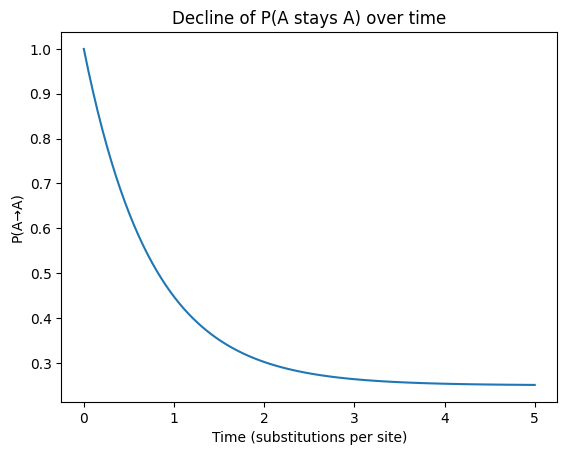

In [2]:
def transition_matrix(Q, t):
    return expm(Q * t)

times = np.linspace(0, 5, 100)
P_AA = [transition_matrix(Q, t)[0,0] for t in times]  # prob A stays A
plt.plot(times, P_AA)
plt.xlabel("Time (substitutions per site)")
plt.ylabel("P(A→A)")
plt.title("Decline of P(A stays A) over time")
plt.show()

#Section C. Observed vs. Actual Distance

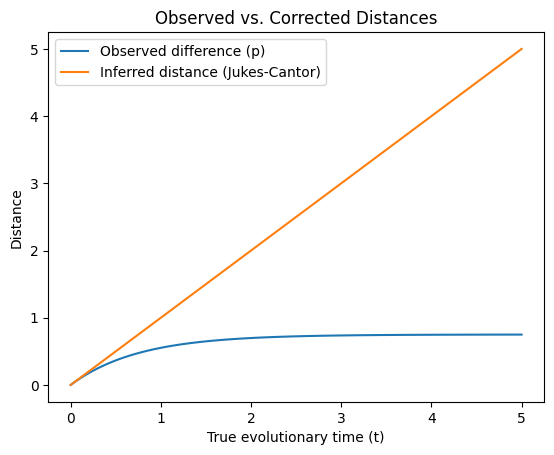

In [3]:
# Observed difference p = 1 - P(same base)
p = 1 - np.array(P_AA)

# Corrected JC distance
d_JC = -(3/4) * np.log(1 - (4/3)*p)

plt.plot(times, p, label="Observed difference (p)")
plt.plot(times, d_JC, label="Inferred distance (Jukes-Cantor)")
plt.legend()
plt.xlabel("True evolutionary time (t)")
plt.ylabel("Distance")
plt.title("Observed vs. Corrected Distances")
plt.show()

#Section D. Connect to PAM


In [4]:
PAM1 = np.eye(20) * 0.99 + (np.ones((20,20)) - np.eye(20)) * 0.01/19
PAM250 = np.linalg.matrix_power(PAM1, 250)

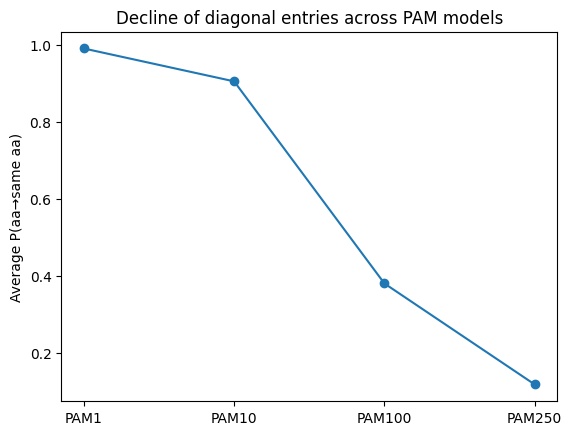

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Toy PAM1-like matrix:
# 99% chance of staying the same, 1% chance distributed evenly across 19 other amino acids
PAM1 = np.eye(20) * 0.99 + (np.ones((20,20)) - np.eye(20)) * (0.01 / 19)

# Compute higher PAM matrices by repeated multiplication
PAM10 = np.linalg.matrix_power(PAM1, 10)
PAM100 = np.linalg.matrix_power(PAM1, 100)
PAM250 = np.linalg.matrix_power(PAM1, 250)

# Let's track the diagonal (probability of no change) across these PAM matrices
diagonals = [np.mean(np.diag(P)) for P in [PAM1, PAM10, PAM100, PAM250]]
labels = ["PAM1", "PAM10", "PAM100", "PAM250"]

plt.plot(labels, diagonals, marker="o")
plt.ylabel("Average P(aa→same aa)")
plt.title("Decline of diagonal entries across PAM models")
plt.show()

$P(t)=e^{Qt}=I+Qt+\tfrac{1}{2!}(Qt)^2+\tfrac{1}{3!}(Qt)^3+\cdots$

In [7]:
import numpy as np
import pandas as pd
from scipy.linalg import expm

# Simple Jukes–Cantor rate matrix (4x4 nucleotides)
Q = np.full((4,4), 1/3)   # off-diagonal rates
np.fill_diagonal(Q, -1)   # row sums = 0

# Display Q as a table
nucleotides = ["A","C","G","T"]
pd.DataFrame(Q, index=nucleotides, columns=nucleotides)

,A,C,G,T
A,-1.000000,0.333333,0.333333,0.333333
C,0.333333,-1.000000,0.333333,0.333333
G,0.333333,0.333333,-1.000000,0.333333
T,0.333333,0.333333,0.333333,-1.000000


#Example: Show Q and P(t) matrices

In [8]:
import numpy as np
import pandas as pd
from scipy.linalg import expm

# Simple Jukes–Cantor rate matrix (4x4 nucleotides)
Q = np.full((4,4), 1/3)   # off-diagonal rates
np.fill_diagonal(Q, -1)   # row sums = 0

# Display Q as a table
nucleotides = ["A","C","G","T"]
pd.DataFrame(Q, index=nucleotides, columns=nucleotides)

,A,C,G,T
A,-1.000000,0.333333,0.333333,0.333333
C,0.333333,-1.000000,0.333333,0.333333
G,0.333333,0.333333,-1.000000,0.333333
T,0.333333,0.333333,0.333333,-1.000000


#Transition matrices at different times


In [10]:
def transition_matrix(Q, t):
    return expm(Q * t)

# Compute P(t) for some times
times = [0.1, 0.5, 1, 2]
for t in times:
    P = transition_matrix(Q, t)
    print(f"\nTransition matrix P(t) at t={t}")
    display(pd.DataFrame(P.round(4), index=nucleotides, columns=nucleotides))


Transition matrix P(t) at t=0.1


,A,C,G,T
A,0.9064,0.0312,0.0312,0.0312
C,0.0312,0.9064,0.0312,0.0312
G,0.0312,0.0312,0.9064,0.0312
T,0.0312,0.0312,0.0312,0.9064



Transition matrix P(t) at t=0.5


,A,C,G,T
A,0.6351,0.1216,0.1216,0.1216
C,0.1216,0.6351,0.1216,0.1216
G,0.1216,0.1216,0.6351,0.1216
T,0.1216,0.1216,0.1216,0.6351



Transition matrix P(t) at t=1


,A,C,G,T
A,0.4477,0.1841,0.1841,0.1841
C,0.1841,0.4477,0.1841,0.1841
G,0.1841,0.1841,0.4477,0.1841
T,0.1841,0.1841,0.1841,0.4477



Transition matrix P(t) at t=2


,A,C,G,T
A,0.3021,0.2326,0.2326,0.2326
C,0.2326,0.3021,0.2326,0.2326
G,0.2326,0.2326,0.3021,0.2326
T,0.2326,0.2326,0.2326,0.3021


#Optional: Show powers of PAM1

In [11]:
# toy PAM1 (20x20 reduced for demonstration)
PAM1 = np.eye(4)*0.99 + (np.ones((4,4))-np.eye(4))*(0.01/3)

for n in [1, 10, 100]:
    PAMn = np.linalg.matrix_power(PAM1, n)
    print(f"\nPAM{n} substitution matrix")
    display(pd.DataFrame(PAMn.round(4), index=nucleotides, columns=nucleotides))


PAM1 substitution matrix


,A,C,G,T
A,0.9900,0.0033,0.0033,0.0033
C,0.0033,0.9900,0.0033,0.0033
G,0.0033,0.0033,0.9900,0.0033
T,0.0033,0.0033,0.0033,0.9900



PAM10 substitution matrix


,A,C,G,T
A,0.9058,0.0314,0.0314,0.0314
C,0.0314,0.9058,0.0314,0.0314
G,0.0314,0.0314,0.9058,0.0314
T,0.0314,0.0314,0.0314,0.9058



PAM100 substitution matrix


,A,C,G,T
A,0.4459,0.1847,0.1847,0.1847
C,0.1847,0.4459,0.1847,0.1847
G,0.1847,0.1847,0.4459,0.1847
T,0.1847,0.1847,0.1847,0.4459
